# Build a Simple Neural Net with Python

### Forward Propagation

![Simple NN](./img/simple-nn-1.png)

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The `input_data` is a an array of the number of accounts, `3`, and number of children,`5`. The weights are available in a dictionary called `weights`. The array of weights for the first node in the hidden layer are in `weights['node_0']`, and the array of weights for the second node in the hidden layer are in `weights['node_1']`.

The weights feeding into the output node are available in `weights['output']`.

Q. How are the weights that determine the features/interactions in Neural Networks created? 

A. The model training process sets them to optimize predictive accuracy.

Q. Which layers of a model capture more complex or "higher level" interactions?

A. The last layers capture the most complex interactions.

In [1]:
import numpy as np
import pandas as pd

input_data = np.array([3,5])
weights = {
    'node_0': np.array([2,4]),
    'node_1': np.array([4,-5]),
    'output': np.array([2,7])
}

In [2]:
# Calculate the value in node 0 by multiplying input_data by its 
# weights weights['node_0'] and computing their sum. This is the 
# 1st node in the hidden layer.
node_0_value = (input_data * weights['node_0']).sum()

# Calculate the value in node 1 using input_data and weights['node_1']. 
# This is the 2nd node in the hidden layer.
node_1_value = (input_data * weights['node_1']).sum()

# Put the hidden layer values into an array.
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Generate the prediction by multiplying hidden_layer_outputs by 
# weights['output'] and computing their sum.
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)


-39


### Applying an Activation Function

An **activation function** is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function **takes a single number as an input, returning 0 if the input is negative, and returning the input if it is positive**.

In [3]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Apply the relu() function to node_0_input to calculate node_0_output.
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Apply the relu() function to node_1_input to calculate node_1_output.
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


We predicted `52` transactions. Prior to this activation function. Prior to using the function we had predicted a negative number, `-39`.

We'll now define a function called `predict_with_network()` which will generate predictions for multiple data observations.

In [4]:
# Define a function called predict_with_network() that accepts two arguments - 
# input_data_row and weights - and returns a prediction from the network as the output.
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

print(results)

[36, 60]


### Multi-Layer Neural Network

![Multi Layer NN](./img/simple-nn-2.png)

We'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The nodes in the first hidden layer are called `node_0_0` and `node_0_1`. Their weights are `weights['node_0_0']` and `weights['node_0_1']` respectively.

The nodes in the second hidden layer are called `node_1_0` and `node_1_1`. Their weights are pre-loaded as `weights['node_1_0']` and `weights['node_1_1']` respectively.

We then create a model output from the hidden nodes using weights pre-loaded as `weights['output']`.

In [5]:
weights = {
    'node_0_0': np.array([2, 4]),
    'node_0_1': np.array([ 4, -5]),
    'node_1_0': np.array([-1, 2]),
    'node_1_1': np.array([1, 2]),
    'output': np.array([2, 7])
}

In [6]:
def predict_with_network(input_data, weights):
    # Calculate node_0_0_input using its weights weights['node_0_0'] and the 
    # given input_data. Then apply the relu() function to get node_0_0_output
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Repeat for node_0_1_input to get node_0_1_output
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node_1_0_input using its weights weights['node_1_0'] and the 
    # outputs from the first hidden layer - hidden_0_outputs. 
    # Then apply the relu() function to get node_1_0_output.
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Repeat for node_1_1_input to get node_1_1_output
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model_output using its weights weights['output'] and the outputs 
    # from the second hidden layer hidden_1_outputs array. 
    # Do not apply the relu() function to this output.
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data, weights)
print(output)


182


### Determining how weight changes affect accuracy

![simple nn 3](./img/simple-nn-3.png)

We'll look at how a change to the weights in a network affect the model's accuracy.

Given that the actual target is `3`, update one of the weights to return an out put of `3`. The current value is `9`. Change one of the `weights` values to return a prediction of `3`. 

In [9]:
def predict_with_network(input_data, weights):
    # Calculate node_0_0_input using its weights weights['node_0_0'] and the 
    # given input_data. Then apply the relu() function to get node_0_0_output
    node_0_input = (input_data * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    # Calculate node_1_0_input using its weights weights['node_1_0'] and the 
    # outputs from the first hidden layer - hidden_0_outputs. 
    # Then apply the relu() function to get node_1_0_output.
    node_1_input = (input_data * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

   
    # Put node values into array: hidden_1_outputs
    hidden_output = np.array([node_0_output, node_1_output])

    # Calculate model_output using its weights weights['output'] and the outputs 
    # from the second hidden layer hidden_1_outputs array. 
    # Do not apply the relu() function to this output.
    model_output = (hidden_output * weights['output']).sum()
    
    # Return model_output
    return(model_output)

In [10]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [-1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


### Scaling up to multiple data points

Usually, we'll want to measure model accuracy on many points. So we'll write code to compare model accuracies for two different sets of weights, `weights_0` and `weights_1`. 

`input_data` is a list of arrays. Each item in that list contains the data to make a single prediction. 

`target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.

We'll use the sklearn's `mean_squared_error()` function. It takes the true values and the predicted values as arguments.

In [14]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}
target_actuals = [1, 3, 5, 7]

In [15]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Make predictions for each row with weights_0 using the 
    # predict_with_network() function and append it to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # repeat for model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error of model_output_0 and then model_output_1 
# using the mean_squared_error() function. The first argument should be the
# actual values (target_actuals), and the second argument should be the 
# predicted values (model_output_0 or model_output_1).
mse_0 = mean_squared_error(target_actuals, model_output_0)

# repeat for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


### Gradient Descent

**1. Calculating the Slope**

We're now going to calculate the slope. When plotting the **mean-squared error** loss function against predictions, the slope is `2 * x * (y-xb)`, or `2 * input_data * error`. Note that `x` and `b` may have multiple numbers (`x` is a vector for each data point, and `b` is a vector). In this case, the output will also be a vector, which is exactly what you want.

In [17]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

# Calculate the predictions, preds, by multiplying weights 
# by the input_data and computing their sum.
preds = (weights * input_data).sum()

# Calculate the error, which is target minus preds. Notice that this 
# error corresponds to y-xb in the gradient expression.
error = target - preds

# Calculate the slope of the loss function with respect to the prediction. 
# To do this, you need to take the product of input_data and error 
# and multiply that by 2.
slope = 2 * input_data * error

# Print the slope
print(slope)

[-14 -28 -42]


**2. Improving Model Weights**

We'll use the slopes to improve our model. If we add the slopes to our weights, we will move in the right direction. However, it's possible to move too far in that direction. So we will want to take smaller steps in that direction first, by multiplying **learning rate** by the slope and subtracting that from the weights.

In [18]:
# Set the learning rate to be 0.01 and calculate 
# the error from the original predictions
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Calculate the updated weights by subtracting the product of 
# learning_rate and slope from weights
weights_updated = weights - (learning_rate * slope)

# Calculate the updated predictions by multiplying weights_updated 
# with input_data and computing their sum.
preds_updated = (weights_updated * input_data).sum()

# Calculate the error for the new predictions.
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


**3. Making Multiple Updates to Weights**

You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

In [21]:
import matplotlib.pyplot as plt

def get_slope(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return 2 * input_data * error

def get_mse(input_data, target, weights):
    preds = (weights * input_data).sum()
    return ((target - preds)**2).mean()

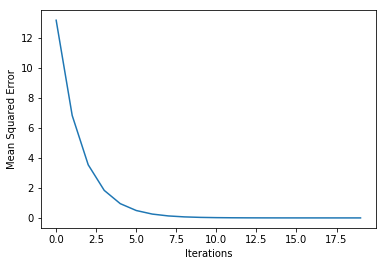

In [22]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - (0.01 * slope)
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()